In [1]:
import json
import os
import numpy
import torch

In [6]:
len(os.listdir('/vision/vision_data/omniobject3D/OpenXD-OmniObject3D-New/raw/blender_renders/anise/anise_002/render/images/'))

100

In [23]:
num_instances = 0

root = '/vision/vision_data/omniobject3D/OpenXD-OmniObject3D-New/raw/blender_renders'
for category in os.listdir(root):
    category_path = os.path.join(root, category)
    num_instances += len(os.listdir(category_path))
    for instance in os.listdir(category_path):
        if category not in instance:
            continue
        instance_path = os.path.join(category_path, instance)
        num_views = len(os.listdir(os.path.join(instance_path, 'render/images')))
        if num_views != 100:
            print(instance_path)

print(num_instances)


5509


In [2]:
file_path = '/vision/vision_data/omniobject3D/OpenXD-OmniObject3D-New/raw/blender_renders/anise/anise_001/render/transforms.json'
with open(file_path, 'r') as f:
    transforms = json.load(f)

In [8]:
transforms.keys()

dict_keys(['camera_angle_x', 'frames'])

In [10]:
transforms['camera_angle_x']

0.6911112070083618

In [12]:
type(transforms['frames'])

list

In [13]:
len(transforms['frames'])

100

In [35]:
transforms['frames'][20]

{'file_path': 'r_20',
 'rotation': 0.06283185307179587,
 'transform_matrix': [[0.23849447071552277,
   0.6376613974571228,
   -0.7324672341346741,
   -2.952669858932495],
  [-0.9711437821388245,
   0.1565975397825241,
   -0.1798800528049469,
   -0.7251197099685669],
  [0.0, 0.7542314529418945, 0.6566085815429688, 2.646873950958252],
  [0.0, 0.0, 0.0, 1.0]],
 'scale': 0.04974293762001597}

In [17]:
E = torch.tensor(transforms['frames'][0]['transform_matrix'])
E

tensor([[-4.4421e-01,  6.7243e-01, -5.9204e-01, -2.3866e+00],
        [-8.9592e-01, -3.3340e-01,  2.9354e-01,  1.1833e+00],
        [ 1.4901e-08,  6.6082e-01,  7.5054e-01,  3.0255e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [4]:
import numpy as np
from PIL import Image

def load_frame(seq_path, file_name, **kwargs):
        file_path = os.path.join(seq_path, file_name)
        img_pil = Image.open(file_path)
        img_np = np.asarray(img_pil)
        print(img_np.shape)
        mask = Image.fromarray((img_np[:,:,3] > 0).astype(float))
        
        rgb = Image.fromarray(img_np[:,:,:3])

        rgb = rgb.resize((256, 256), Image.ANTIALIAS)
        mask = mask.resize((256, 256), Image.NEAREST)

        rgb = np.asarray(rgb).transpose((2,0,1)) / 255.0                            # [3,H,W], in range [0,1]
        mask = np.asarray(mask)[:,:,np.newaxis].transpose((2,0,1))                  # [1,H,W], in range [0,1]
        
        rgb *= mask
        
        return rgb, mask

In [8]:
seq_path = '/vision/vision_data/omniobject3D/OpenXD-OmniObject3D-New/raw/blender_renders/doll/doll_001/render/images'
file_name = 'r_50.png'
img, mask = load_frame(seq_path, file_name)

(800, 800, 3)


IndexError: index 3 is out of bounds for axis 2 with size 3

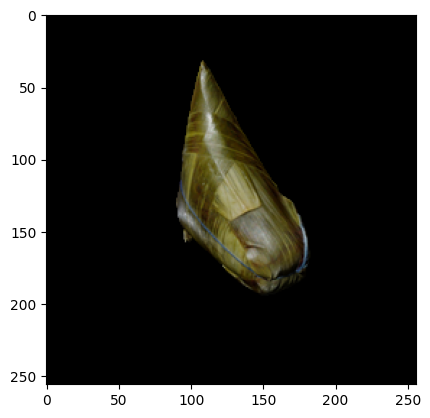

In [31]:
import matplotlib.pyplot as plt

plt.imshow(img.transpose(1,2,0))

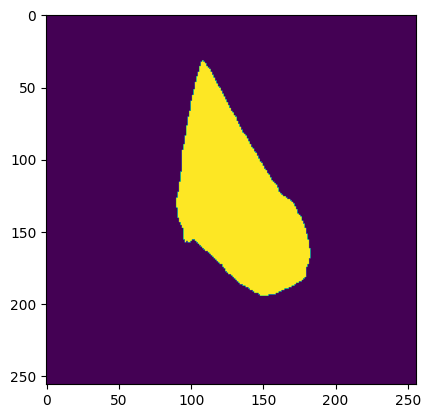

In [32]:
plt.imshow(mask.transpose(1,2,0))